In [1]:
# Import Libs
import math
import numpy
import string
import random
import string
import pandas as pd
import matplotlib.pyplot as plt
from utils import make_plots,extract_features

In [2]:
# Import data
data_recipes=pd.read_csv('data/RAW_recipes.csv')  
data_interactions=pd.read_csv('data/RAW_interactions.csv')  

In [3]:
col='nutrition'
macros=['calories','fat','sugar','sodium','protein','sat_fat']
data_recipes=extract_features(data_recipes,col,macros)

In [4]:
# Convert date to datetime
data_recipes['submitted'] = pd.to_datetime(data_recipes['submitted'])
data_interactions['date'] = pd.to_datetime(data_interactions['date'])
# Rename column for Recipe ID so we can merge with column name
data_interactions.rename(columns={'recipe_id':'id'}, inplace=True)
# Merge both dataframes
Merged_data=pd.merge(data_interactions, data_recipes, on='id')

In [5]:
# This is the data that is created after merging both csv files
Merged_data

,user_id,id,date,rating,review,name,minutes,contributor_id,submitted,tags,...,steps,description,ingredients,n_ingredients,calories,fat,sugar,sodium,protein,sat_fat
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...",...,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9,204.8,5.0,9.0,26.0,24.0,2.0
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",white bean green chile pepper soup,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...",...,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9,204.8,5.0,9.0,26.0,24.0,2.0
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,devilicious cookie cake delights,20,56824,2002-10-27,"['30-minutes-or-less', 'time-to-make', 'course...",...,"['blend together cake mix , oil and eggs', 'ad...",NaN,"[""devil's food cake mix"", 'vegetable oil', 'eg...",4,132.3,11.0,39.0,5.0,4.0,11.0
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,baked potato toppings,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...",...,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13,2786.2,342.0,134.0,290.0,161.0,301.0
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",baked potato toppings,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...",...,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13,2786.2,342.0,134.0,290.0,161.0,301.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132362,417131,241491,2007-09-05,4,I made this over the weekend and changed it up...,maple apple baked beans,375,65197,2007-07-19,"['course', 'main-ingredient', 'cuisine', 'prep...",...,"['place beans in soup kettle', 'add water to c...",i've been looking for a perfect baked bean rec...,"['dried navy beans', 'water', 'bacon', 'onion'...",10,518.1,29.0,138.0,26.0,34.0,35.0
1132363,648540,241491,2010-09-06,5,"Fabulous! We are vegetarian, so I used vegetar...",maple apple baked beans,375,65197,2007-07-19,"['course', 'main-ingredient', 'cuisine', 'prep...",...,"['place beans in soup kettle', 'add water to c...",i've been looking for a perfect baked bean rec...,"['dried navy beans', 'water', 'bacon', 'onion'...",10,518.1,29.0,138.0,26.0,34.0,35.0
1132364,1269180,257796,2011-08-07,4,Very tender and juicy - had trouble getting t...,slow cooker garlic chicken with rosemary,440,140981,2007-10-08,"['main-ingredient', 'preparation', 'occasion',...",...,"['place rosemary springs , 1 lemon half , cele...",delicious and easy!,"['roasting chickens', 'lemons', 'rosemary spri...",9,566.2,59.0,12.0,15.0,86.0,55.0
1132365,116593,72730,2003-12-09,0,Another approach is to start making sauce with...,cranberry peach maple relish,22,103078,2003-10-06,"['30-minutes-or-less', 'time-to-make', 'course...",...,"['blend peaches until coarse', 'place in sauce...",great simple alternative to regular cranberry ...,"['peaches', 'brown sugar', 'allspice', 'maple ...",6,1941.7,3.0,1569.0,3.0,10.0,1.0


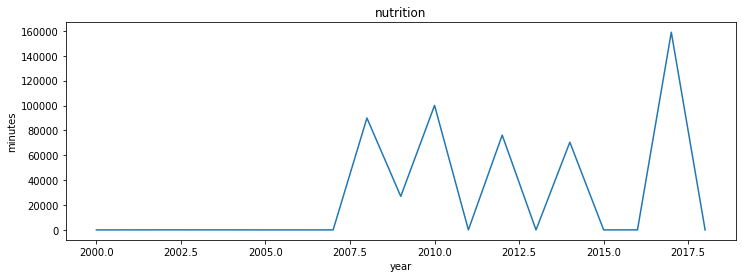

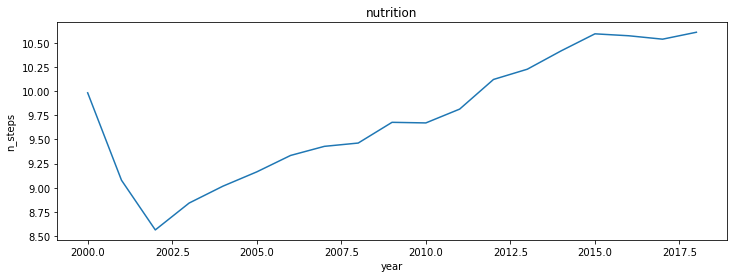

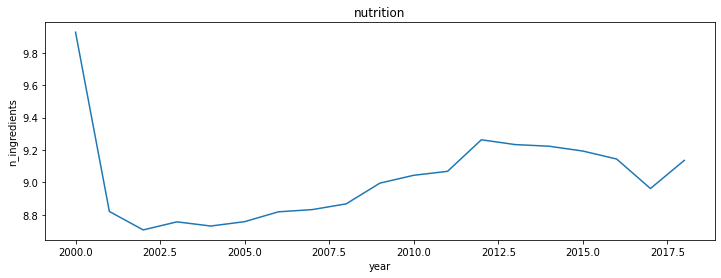

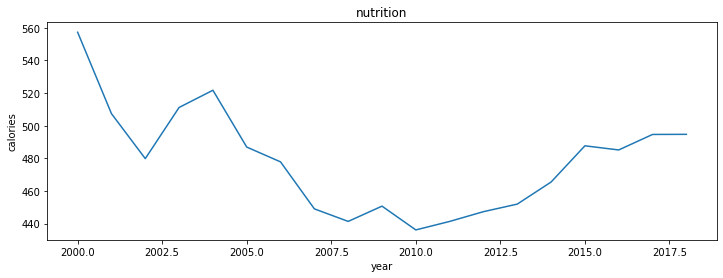

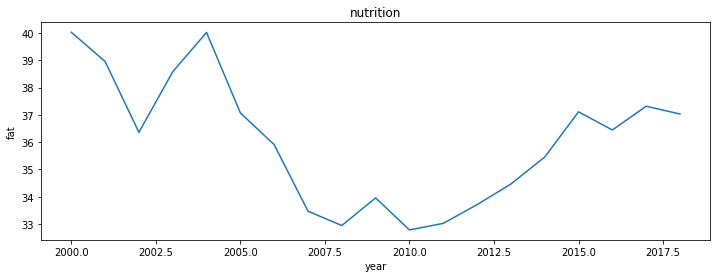

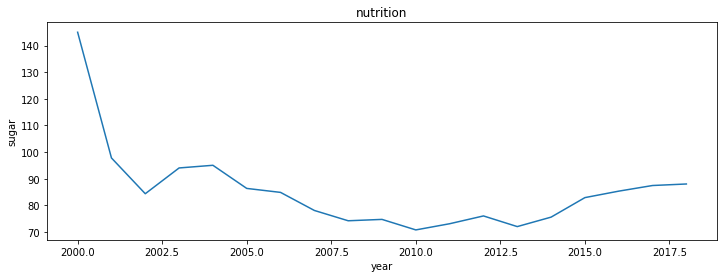

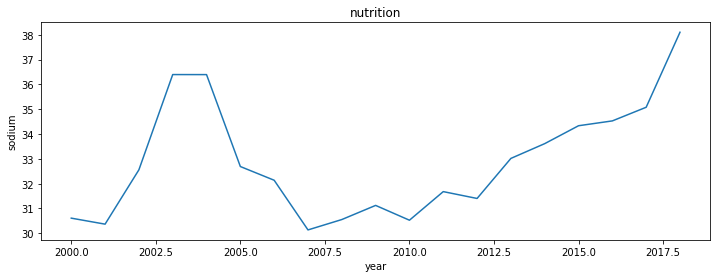

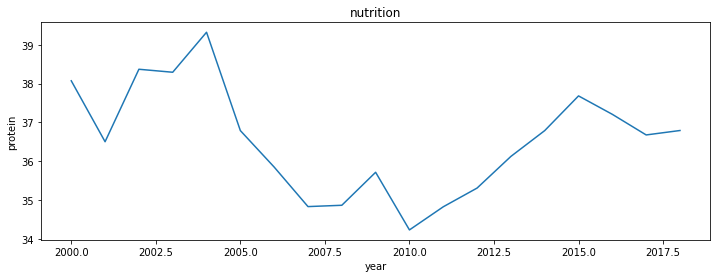

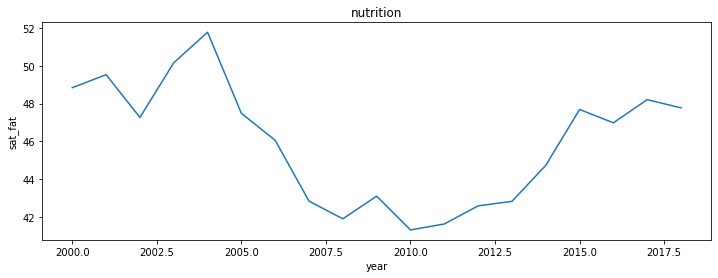

In [6]:
# Make Plots
plot_vals=['minutes','n_steps','n_ingredients','calories','fat','sugar','sodium','protein','sat_fat']
title='nutrition'
for c in plot_vals:
    make_plots(Merged_data,title,'date',c,'line','year')

<AxesSubplot:>

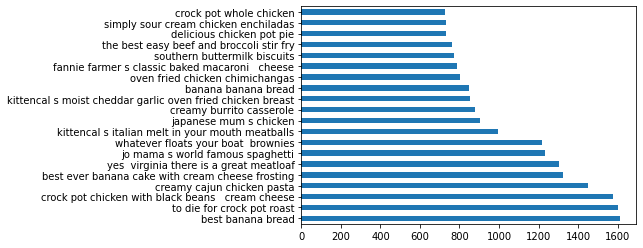

In [7]:
# most popular recipies overall
Merged_data['name'].value_counts()[:20].plot(kind='barh')

In [8]:
Merged_data['name'].value_counts()

best banana bread                                    1614
to die for crock pot roast                           1601
crock pot chicken with black beans   cream cheese    1579
creamy cajun chicken pasta                           1448
best ever banana cake with cream cheese frosting     1322
                                                     ... 
spicy chicken nuggets                                   1
butter chicken soup                                     1
9 layer mexican dip                                     1
sneaky chef brainy brownies                             1
peppermint patty shot                                   1
Name: name, Length: 230185, dtype: int64

In [9]:
# Add month and year columns
Merged_data['year']=Merged_data['date'].dt.year
Merged_data['month']=Merged_data['date'].dt.month

In [10]:
# create a dataframe the returns grouping by year for recipes
test=Merged_data.groupby(['year','id','name'])['id'].agg(['count']).sort_values(by='count', ascending=False)
test=test.groupby('year').head(1)

In [11]:
# Most popular recipes by year top 3
print(test.sort_values(by='year', ascending=False))

                                                               count
year id     name                                                    
2018 2886   best banana bread                                    345
2017 2886   best banana bread                                    371
2016 2886   best banana bread                                    157
2015 2886   best banana bread                                    186
2014 2886   best banana bread                                     80
2013 497021 mile high cabbage pie  5fix                          126
2012 486261 mexican stack up  rsc                                214
2011 89204  crock pot chicken with black beans   cream cheese    147
2010 89204  crock pot chicken with black beans   cream cheese    207
2009 89204  crock pot chicken with black beans   cream cheese    305
2008 89204  crock pot chicken with black beans   cream cheese    359
2007 39087  creamy cajun chicken pasta                           157
2006 77397  kittencal s 5 minute c

In [12]:
# most popular recipies by month
test=Merged_data.groupby(['month','id','name'])['id'].agg(['count']).sort_values(by='count', ascending=False)
test=test.groupby('month').head(1)
print(test.sort_values(by='month', ascending=False))

                                                     count
month id     name                                         
12    80156  the most wonderful gingerbread cookies    320
11    27208  to die for crock pot roast                152
10    27208  to die for crock pot roast                210
9     486496 bacon lattice tomato muffins  rsc         169
8     2886   best banana bread                         153
7     2886   best banana bread                         134
6     2886   best banana bread                         147
5     2886   best banana bread                         126
4     2886   best banana bread                         125
3     20616  irish rosie s irish soda bread            199
2     27208  to die for crock pot roast                162
1     39087  creamy cajun chicken pasta                206


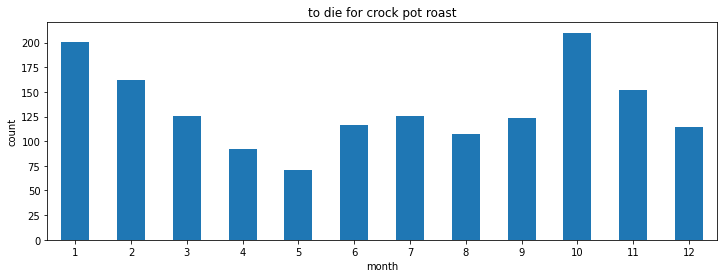

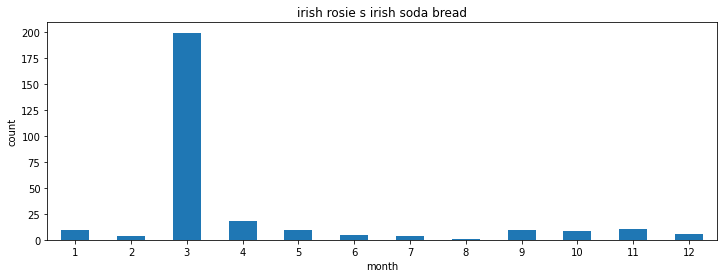

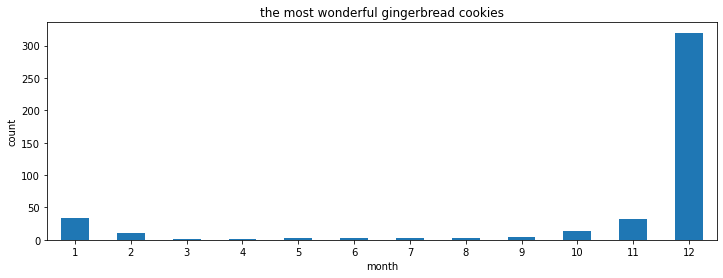

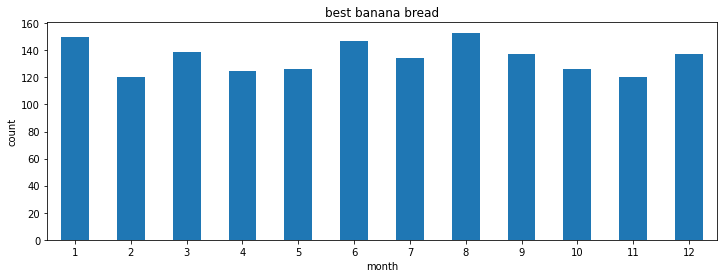

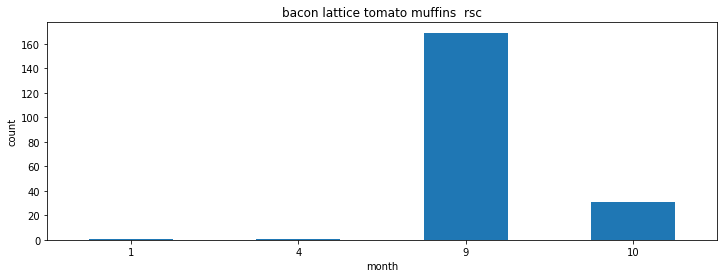

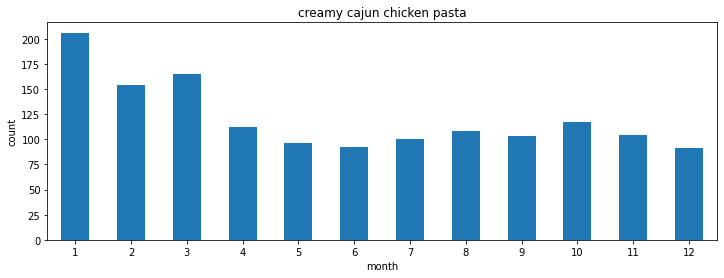

In [13]:
# Plotting the count for all recipies found from above cell for each month
names=set(test.index.get_level_values(2).tolist())
for n in names:
    test2=Merged_data.loc[Merged_data['name'] == n].copy()
    test2['count'] = test2.groupby(['month'])['month'].transform('count')
    title=n
    make_plots(test2,title,'date','count','bar','month')
    

In [ ]:
# analysis on ingredients 